## Marketing Data - Preprocessing and Feature Engineering

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dat

df = pd.read_csv('marketing_data.csv')

### Feature Engineering

In [20]:
# Total number of purchase across all channels
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [22]:
# Total amount spent across all product categories

df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [23]:
# Average spent per purchase

df['Avg_Spent_Per_Purchase'] = df['Total_Spent'] / df['Total_Purchases']
df['Avg_Spent_Per_Purchase'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Avg_Spent_Per_Purchase'].fillna(0, inplace=True)

In [24]:
# Preferred shopping channel (Web, Catalog, Store, Deals)

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Preferred_Channel'] = df[purchase_cols].idxmax(axis=1)
df['Preferred_Channel'] = df['Preferred_Channel'].str.replace('Num', '').str.replace('Purchases', '')

In [25]:
# Preferred product category

product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Preferred_Product'] = df[product_cols].idxmax(axis=1)
df['Preferred_Product'] = df['Preferred_Product'].str.replace('Mnt', '')

In [26]:
# Calculate campaign response rate

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Campaign_Response_Rate'] = df[campaign_cols].sum(axis=1) / len(campaign_cols)

In [27]:
# Recency score (inverted Recency - higher is better)

if 'Recency' in df.columns:
    max_recency = df['Recency'].max()
    df['Recency_Score'] = max_recency - df['Recency']

In [28]:
# Create customer segments based on spending

spending_bins = [0, 500, 1500, float('inf')]
spending_labels = ['Low Spender', 'Medium Spender', 'High Spender']
df['Spending_Segment'] = pd.cut(df['Total_Spent'], bins=spending_bins, labels=spending_labels)

In [30]:
# Age calculation (assuming data is from 2023)
if 'Year_Birth' in df.columns:
    df['Age'] = 2023 - df['Year_Birth']
    
    # Age groups
    age_bins = [0, 35, 50, 65, float('inf')]
    age_labels = ['Young Adult', 'Adult', 'Senior Adult', 'Elderly']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [31]:
# Has children flag
if 'Kidhome' in df.columns and 'Teenhome' in df.columns:
    df['Has_Children'] = ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int)
    df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [33]:
# Customer value score (simple version)
df['Customer_Value'] = df['Total_Spent'] * df['Campaign_Response_Rate'] * (1 + df['Customer_Days']/10)


## Visualization of Engineered Features

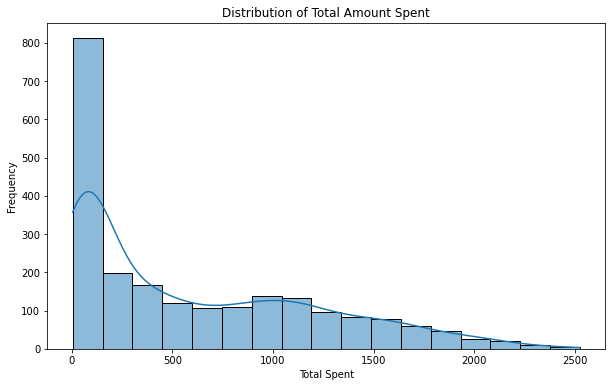

In [34]:
# Distribution of Total Spent

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Spent'], kde=True)
plt.title('Distribution of Total Amount Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

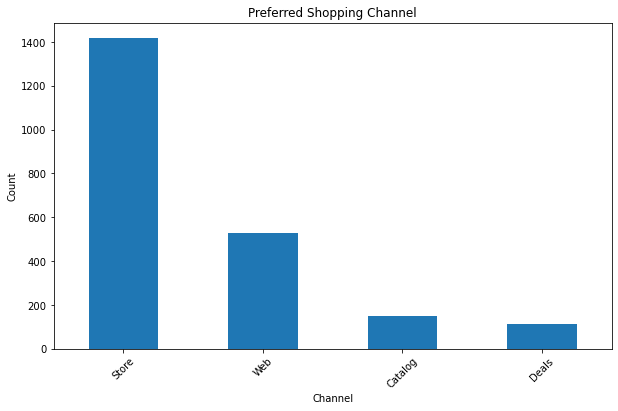

In [35]:
# Preferred Channel Distribution

plt.figure(figsize=(10, 6))
df['Preferred_Channel'].value_counts().plot(kind='bar')
plt.title('Preferred Shopping Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

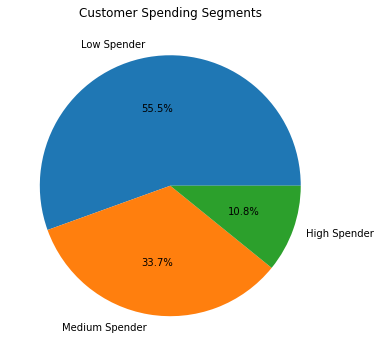

In [36]:
# Spending Segments

plt.figure(figsize=(10, 6))
df['Spending_Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Spending Segments')
plt.ylabel('')
plt.show()

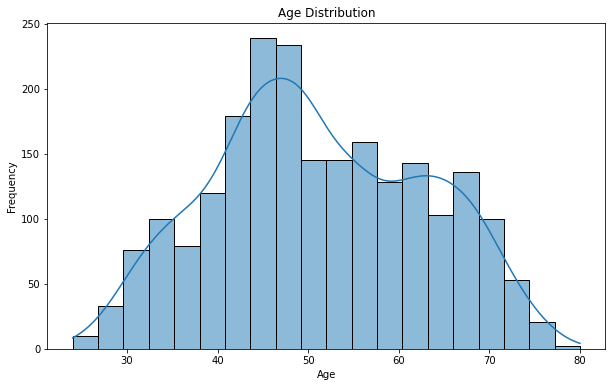

In [37]:
# Age Distribution
if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], kde=True, bins=20)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

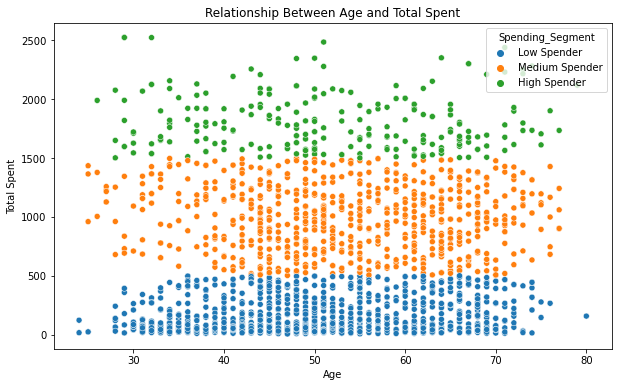

In [38]:
# Relationship between Age and Total Spent

if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Total_Spent', hue='Spending_Segment', data=df)
    plt.title('Relationship Between Age and Total Spent')
    plt.xlabel('Age')
    plt.ylabel('Total Spent')
    plt.show()

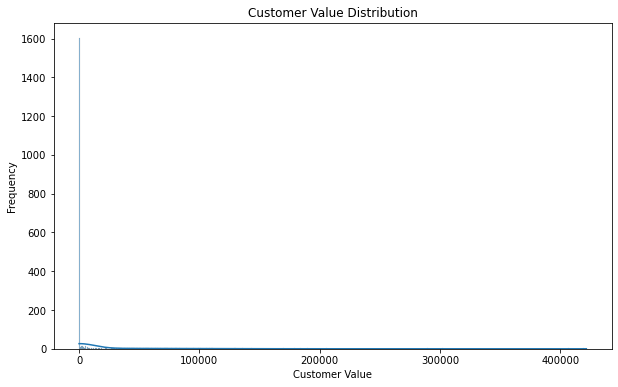

In [39]:
# Customer Value Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Value'], kde=True)
plt.title('Customer Value Distribution')
plt.xlabel('Customer Value')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Save the processed dataset
df.to_csv('processed_marketing_data.csv', index=False)

print("Preprocessing complete. Processed data saved to 'processed_marketing_data.csv'")

Preprocessing complete. Processed data saved to 'processed_marketing_data.csv'
